### Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from prophet import Prophet

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### CHINA

In [2]:
china_dataset = pd.read_excel('China_Dataset.xlsx')

In [3]:
china_dataset.head(20)

,Country or region,Country code,ds,Bioenergy_yhat,Coal_yhat,Gas_yhat,Hydro_yhat,Solar_yhat,Wind_yhat,Emission
0,China,CHN,2000-01-01,0.19,78.21,0.43,16.41,0.00,0.04,672.366
1,China,CHN,2001-01-01,0.17,76.25,0.33,18.74,0.00,0.05,654.880
2,China,CHN,2002-01-01,0.15,77.54,0.25,17.41,0.00,0.05,663.277
3,China,CHN,2003-01-01,0.13,79.56,0.27,14.85,0.00,0.05,677.915
4,China,CHN,2004-01-01,0.11,78.17,0.34,16.05,0.00,0.06,667.900
5,China,CHN,2005-01-01,0.21,79.20,0.49,15.88,0.00,0.08,670.506
6,China,CHN,2006-01-01,0.25,80.34,0.83,15.21,0.00,0.13,676.615
7,China,CHN,2007-01-01,0.30,80.96,1.03,14.79,0.00,0.17,679.410
8,China,CHN,2008-01-01,0.43,77.49,0.99,18.22,0.00,0.37,649.673
9,China,CHN,2009-01-01,0.56,78.38,1.52,16.57,0.01,0.74,658.037


In [4]:
#Remove a column in the dataset
china_dataset = china_dataset.drop(['Emission'], axis=1)

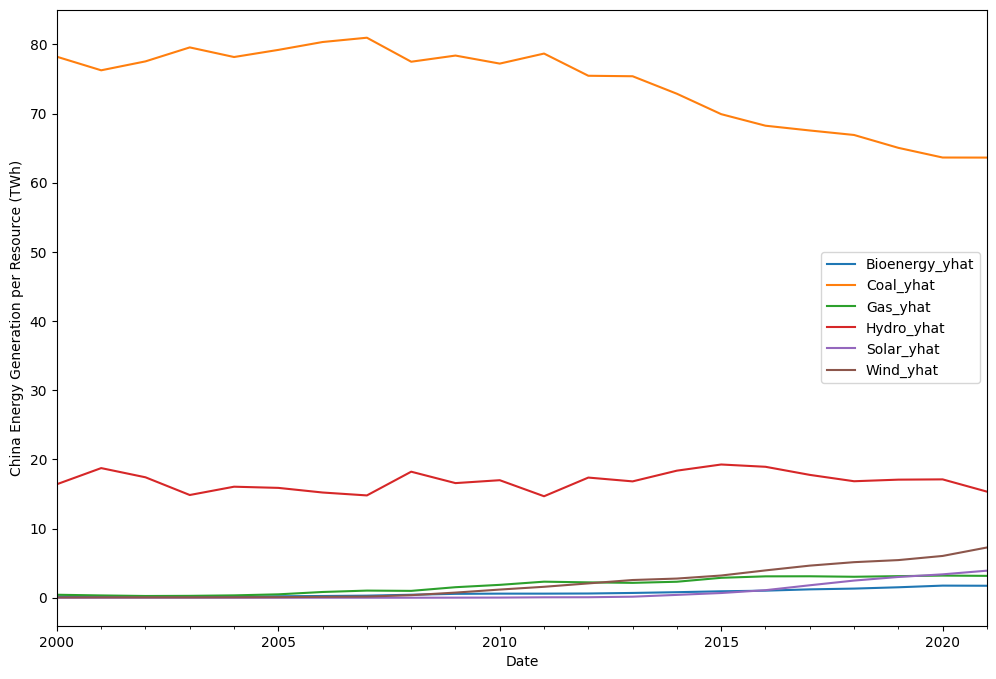

In [5]:
ax = china_dataset.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('China Energy Generation per Resource (TWh)')
ax.set_xlabel('Date')  
plt.show()

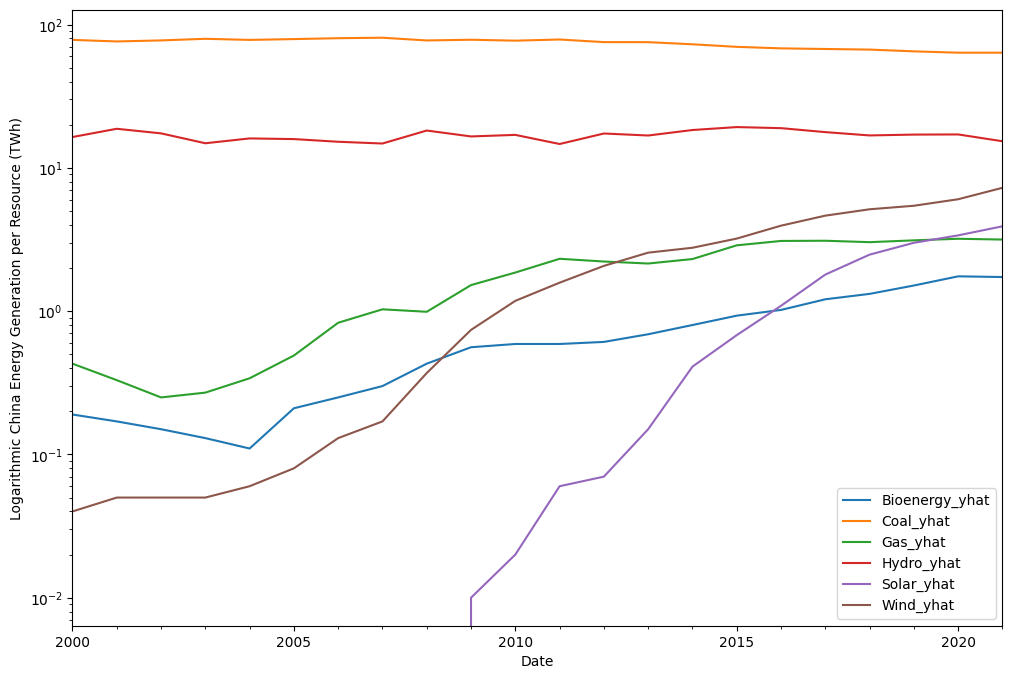

In [6]:
# Make y-axis in log scale
ax = china_dataset.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Logarithmic China Energy Generation per Resource (TWh)')
ax.set_xlabel('Date')  
ax.set_yscale('log')
plt.show()

#### China's bioenergy

In [7]:
China_BioenergyModel = Prophet()

##### Model Validation


In [8]:
China_BioenergyValidationModel = Prophet()
columns_to_load = ['ds', 'Bioenergy_yhat']
dataset_bioenergy = pd.read_excel('China_Dataset.xlsx', usecols=columns_to_load)
dataset_bioenergy = dataset_bioenergy.rename(columns={'ds': 'ds',
                        'Bioenergy_yhat': 'y'})

# Take just the first 15 rows for training
dataset_bioenergy_validation = dataset_bioenergy[:15]
China_BioenergyValidationModel.fit(dataset_bioenergy_validation)
future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
future_validation = pd.DataFrame({'ds': future_years_validation})
forecast_validation = China_BioenergyValidationModel.predict(future_validation)

17:43:43 - cmdstanpy - INFO - Chain [1] start processing
17:43:43 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
datasetX = dataset_bioenergy[15:]
forecast_validation = forecast_validation[['ds', 'yhat']]

pred = forecast_validation['yhat']
correc = datasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(correc, pred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(correc, pred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((correc - pred) / correc)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

Mean Squared Error: 0.201
Root Mean Squared Error: 0.448
Mean Absolute Percentage Error: nan


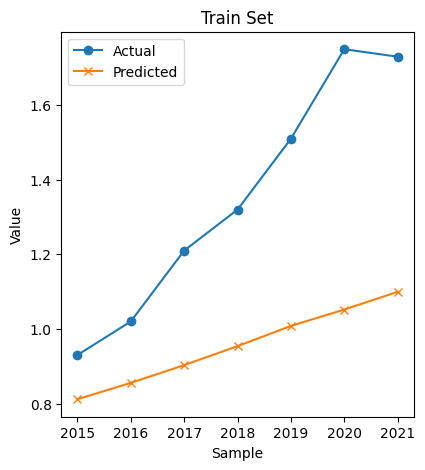

In [34]:
import matplotlib.pyplot as plt
correc.index = [2015,2016,2017,2018,2019,2020,2021]
pred.index = [2015,2016,2017,2018,2019,2020,2021]

plt.figure(figsize=(10, 5))

# Plot for train set
plt.subplot(1, 2, 1)
plt.plot(correc, label='Actual', marker='o')
plt.plot(pred, label='Predicted', marker='x')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Train Set')
plt.legend()

# Show the plots
plt.show()


#### Model Training


In [11]:
columns_to_load = ['ds', 'Bioenergy_yhat']
dataset_bioenergy = pd.read_excel('China_Dataset.xlsx', usecols=columns_to_load)
dataset_bioenergy = dataset_bioenergy.rename(columns={'ds': 'ds',
                        'Bioenergy_yhat': 'y'})
China_BioenergyModel.fit(dataset_bioenergy)

17:43:44 - cmdstanpy - INFO - Chain [1] start processing
17:43:44 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future_years = pd.date_range(start='2022', end='2051', freq='Y')
future = pd.DataFrame({'ds': future_years})
forecast = China_BioenergyModel.predict(future)

In [13]:
columns_to_load = ['ds', 'yhat']
forecasted_values =forecast.loc[:, columns_to_load]
forecasted_values = forecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
China_Bioenergy = pd.concat([dataset_bioenergy, forecasted_values], ignore_index=True)
China_Bioenergy = China_Bioenergy.rename(columns={'ds': 'ds', 'y': 'Bioenergy_yhat'})
China_Bioenergy.head(51)

,ds,Bioenergy_yhat
0,2000-01-01,0.190000
1,2001-01-01,0.170000
2,2002-01-01,0.150000
3,2003-01-01,0.130000
4,2004-01-01,0.110000
5,2005-01-01,0.210000
6,2006-01-01,0.250000
7,2007-01-01,0.300000
8,2008-01-01,0.430000
9,2009-01-01,0.560000


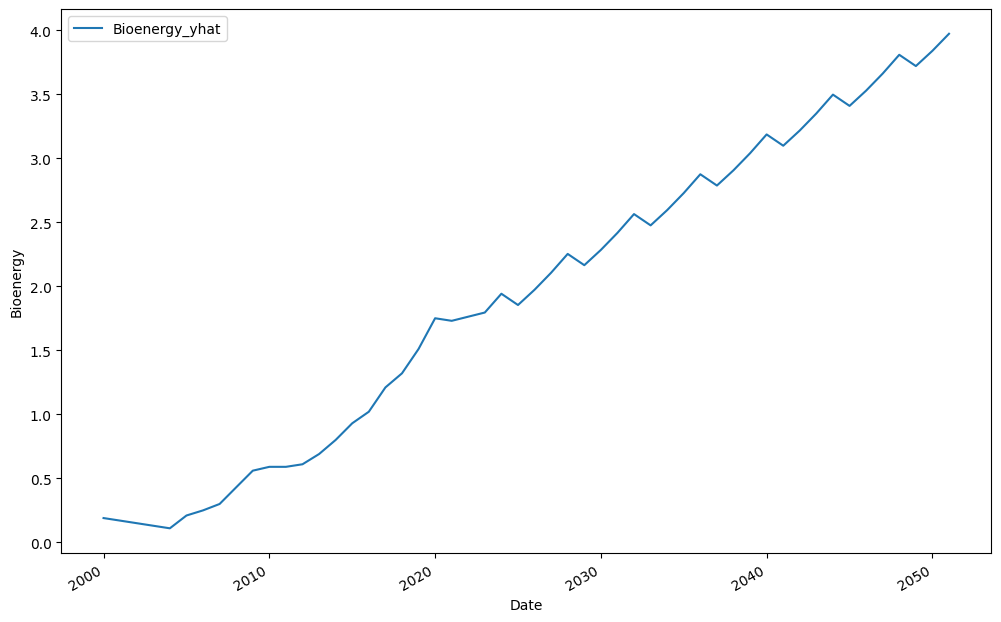

In [14]:
ax = China_Bioenergy.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Bioenergy')
ax.set_xlabel('Date')
plt.show()

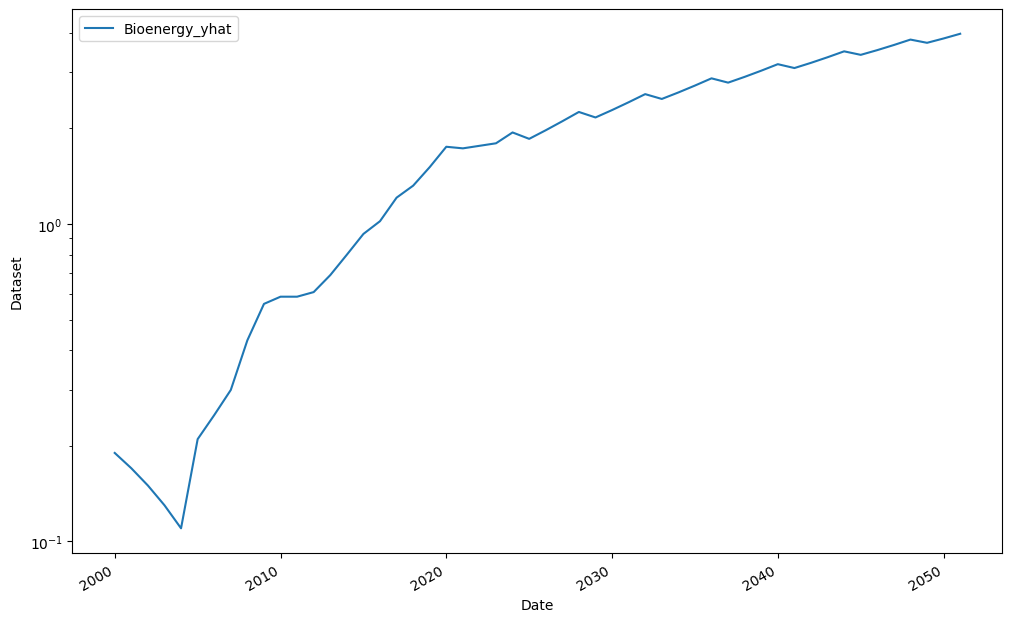

In [15]:
# Make y-axis in log scale
ax = China_Bioenergy.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Dataset')
ax.set_xlabel('Date')  
ax.set_yscale('log')
plt.show()

#### China Coal Model

In [16]:
China_CoalModel = Prophet()

China_CoalValidationModel = Prophet()
columns_to_load = ['ds', 'Coal_yhat']
dataset_Coal = pd.read_excel('China_Dataset.xlsx', usecols=columns_to_load)
dataset_Coal = dataset_Coal.rename(columns={'ds': 'ds',
                        'Coal_yhat': 'y'})

# Take just the first 15 rows for training
dataset_CoalValidation = dataset_Coal[:15]
China_CoalValidationModel.fit(dataset_CoalValidation)
Coal_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Coal_future_validation = pd.DataFrame({'ds': Coal_future_years_validation})
Coal_forecast_validation = China_CoalValidationModel.predict(Coal_future_validation)

CoaldatasetX = dataset_Coal[15:]
Coal_forecast_validation = Coal_forecast_validation[['ds', 'yhat']]

CoalPred = Coal_forecast_validation['yhat']
CoalCorrec = CoaldatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(CoalCorrec, CoalPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(CoalCorrec, CoalPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((CoalCorrec - CoalPred) / CoalCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:43:46 - cmdstanpy - INFO - Chain [1] start processing
17:43:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 19.729
Root Mean Squared Error: 4.442
Mean Absolute Percentage Error: nan


In [17]:
columns_to_load = ['ds', 'Coal_yhat']
dataset_Coal = pd.read_excel('China_Dataset.xlsx', usecols=columns_to_load)
dataset_Coal = dataset_Coal.rename(columns={'ds': 'ds',
                        'Coal_yhat': 'y'})
China_CoalModel.fit(dataset_Coal)

CoalFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
CoalFuture = pd.DataFrame({'ds': CoalFuture_years})
CoalForecast = China_CoalModel.predict(CoalFuture)
columns_to_load = ['ds', 'yhat']
CoalForecasted_values = CoalForecast.loc[:, columns_to_load]
CoalForecasted_values = CoalForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
China_Coal = pd.concat([dataset_Coal, CoalForecasted_values], ignore_index=True)
China_Coal = China_Coal.rename(columns={'ds': 'ds', 'y': 'Coal_yhat'})


17:43:46 - cmdstanpy - INFO - Chain [1] start processing
17:43:47 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
China_Coal.head(51)

,ds,Coal_yhat
0,2000-01-01,78.210000
1,2001-01-01,76.250000
2,2002-01-01,77.540000
3,2003-01-01,79.560000
4,2004-01-01,78.170000
5,2005-01-01,79.200000
6,2006-01-01,80.340000
7,2007-01-01,80.960000
8,2008-01-01,77.490000
9,2009-01-01,78.380000


#### China Gas 


In [19]:
China_GasModel = Prophet()

China_GasValidationModel = Prophet()
columns_to_load = ['ds', 'Gas_yhat']
dataset_Gas = pd.read_excel('China_Dataset.xlsx', usecols=columns_to_load)
dataset_Gas = dataset_Gas.rename(columns={'ds': 'ds',
                        'Gas_yhat': 'y'})

# Take just the first 15 rows for training
dataset_GasValidation = dataset_Gas[:15]
China_GasValidationModel.fit(dataset_GasValidation)
Gas_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Gas_future_validation = pd.DataFrame({'ds': Gas_future_years_validation})
Gas_forecast_validation = China_GasValidationModel.predict(Gas_future_validation)

GasdatasetX = dataset_Gas[15:]
Gas_forecast_validation = Gas_forecast_validation[['ds', 'yhat']]

GasPred = Gas_forecast_validation['yhat']
GasCorrec = GasdatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(GasCorrec, GasPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(GasCorrec, GasPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((GasCorrec - GasPred) / GasCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:43:47 - cmdstanpy - INFO - Chain [1] start processing
17:43:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 0.137
Root Mean Squared Error: 0.370
Mean Absolute Percentage Error: nan


In [20]:
columns_to_load = ['ds', 'Gas_yhat']
dataset_Gas = pd.read_excel('China_Dataset.xlsx', usecols=columns_to_load)
dataset_Gas = dataset_Gas.rename(columns={'ds': 'ds',
                        'Gas_yhat': 'y'})
China_GasModel.fit(dataset_Gas)

GasFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
GasFuture = pd.DataFrame({'ds': GasFuture_years})
GasForecast = China_GasModel.predict(GasFuture)
columns_to_load = ['ds', 'yhat']
GasForecasted_values = GasForecast.loc[:, columns_to_load]
GasForecasted_values = GasForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
China_Gas = pd.concat([dataset_Gas, GasForecasted_values], ignore_index=True)
China_Gas = China_Gas.rename(columns={'ds': 'ds', 'y': 'Gas_yhat'})

17:43:48 - cmdstanpy - INFO - Chain [1] start processing
17:43:48 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
China_Gas.head(51)

,ds,Gas_yhat
0,2000-01-01,0.430000
1,2001-01-01,0.330000
2,2002-01-01,0.250000
3,2003-01-01,0.270000
4,2004-01-01,0.340000
5,2005-01-01,0.490000
6,2006-01-01,0.830000
7,2007-01-01,1.030000
8,2008-01-01,0.990000
9,2009-01-01,1.520000


#### China Hydro

In [22]:
China_HydroModel = Prophet()

China_HydroValidationModel = Prophet()
columns_to_load = ['ds', 'Hydro_yhat']
dataset_Hydro = pd.read_excel('China_Dataset.xlsx', usecols=columns_to_load)
dataset_Hydro = dataset_Hydro.rename(columns={'ds': 'ds',
                        'Hydro_yhat': 'y'})

# Take just the first 15 rows for training
dataset_HydroValidation = dataset_Hydro[:15]
China_HydroValidationModel.fit(dataset_HydroValidation)
Hydro_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Hydro_future_validation = pd.DataFrame({'ds': Hydro_future_years_validation})
Hydro_forecast_validation = China_HydroValidationModel.predict(Hydro_future_validation)

HydrodatasetX = dataset_Hydro[15:]
Hydro_forecast_validation = Hydro_forecast_validation[['ds', 'yhat']]

HydroPred = Hydro_forecast_validation['yhat']
HydroCorrec = HydrodatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(HydroCorrec, HydroPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(HydroCorrec, HydroPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((HydroCorrec - HydroPred) / HydroCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:43:49 - cmdstanpy - INFO - Chain [1] start processing
17:43:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 2.524
Root Mean Squared Error: 1.589
Mean Absolute Percentage Error: nan


In [23]:
columns_to_load = ['ds', 'Hydro_yhat']
dataset_Hydro = pd.read_excel('China_Dataset.xlsx', usecols=columns_to_load)
dataset_Hydro = dataset_Hydro.rename(columns={'ds': 'ds',
                        'Hydro_yhat': 'y'})
China_HydroModel.fit(dataset_Hydro)

HydroFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
HydroFuture = pd.DataFrame({'ds': HydroFuture_years})
HydroForecast = China_HydroModel.predict(HydroFuture)
columns_to_load = ['ds', 'yhat']
HydroForecasted_values = HydroForecast.loc[:, columns_to_load]
HydroForecasted_values = HydroForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
China_Hydro = pd.concat([dataset_Hydro, HydroForecasted_values], ignore_index=True)
China_Hydro = China_Hydro.rename(columns={'ds': 'ds', 'y': 'Hydro_yhat'})

17:43:49 - cmdstanpy - INFO - Chain [1] start processing
17:43:50 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
China_Hydro.head(51)

,ds,Hydro_yhat
0,2000-01-01,16.410000
1,2001-01-01,18.740000
2,2002-01-01,17.410000
3,2003-01-01,14.850000
4,2004-01-01,16.050000
5,2005-01-01,15.880000
6,2006-01-01,15.210000
7,2007-01-01,14.790000
8,2008-01-01,18.220000
9,2009-01-01,16.570000


#### China Solar

In [25]:
China_SolarModel = Prophet()

China_SolarValidationModel = Prophet()
columns_to_load = ['ds', 'Solar_yhat']
dataset_Solar = pd.read_excel('China_Dataset.xlsx', usecols=columns_to_load)
dataset_Solar = dataset_Solar.rename(columns={'ds': 'ds',
                        'Solar_yhat': 'y'})

# Take just the first 15 rows for training
dataset_SolarValidation = dataset_Solar[:15]
China_SolarValidationModel.fit(dataset_SolarValidation)
Solar_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Solar_future_validation = pd.DataFrame({'ds': Solar_future_years_validation})
Solar_forecast_validation = China_SolarValidationModel.predict(Solar_future_validation)

SolardatasetX = dataset_Solar[15:]
Solar_forecast_validation = Solar_forecast_validation[['ds', 'yhat']]

SolarPred = Solar_forecast_validation['yhat']
SolarCorrec = SolardatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(SolarCorrec, SolarPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(SolarCorrec, SolarPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((SolarCorrec - SolarPred) / SolarCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:43:50 - cmdstanpy - INFO - Chain [1] start processing
17:43:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 5.731
Root Mean Squared Error: 2.394
Mean Absolute Percentage Error: nan


In [26]:
columns_to_load = ['ds', 'Solar_yhat']
dataset_Solar = pd.read_excel('China_Dataset.xlsx', usecols=columns_to_load)
dataset_Solar = dataset_Solar.rename(columns={'ds': 'ds',
                        'Solar_yhat': 'y'})
China_SolarModel.fit(dataset_Solar)

SolarFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
SolarFuture = pd.DataFrame({'ds': SolarFuture_years})
SolarForecast = China_SolarModel.predict(SolarFuture)
columns_to_load = ['ds', 'yhat']
SolarForecasted_values = SolarForecast.loc[:, columns_to_load]
SolarForecasted_values = SolarForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
China_Solar = pd.concat([dataset_Solar, SolarForecasted_values], ignore_index=True)
China_Solar = China_Solar.rename(columns={'ds': 'ds', 'y': 'Solar_yhat'})

17:43:51 - cmdstanpy - INFO - Chain [1] start processing
17:43:52 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
China_Solar.head(51)

,ds,Solar_yhat
0,2000-01-01,0.000000
1,2001-01-01,0.000000
2,2002-01-01,0.000000
3,2003-01-01,0.000000
4,2004-01-01,0.000000
5,2005-01-01,0.000000
6,2006-01-01,0.000000
7,2007-01-01,0.000000
8,2008-01-01,0.000000
9,2009-01-01,0.010000


#### China Wind

In [28]:
China_WindModel = Prophet()

China_WindValidationModel = Prophet()
columns_to_load = ['ds', 'Wind_yhat']
dataset_Wind = pd.read_excel('China_Dataset.xlsx', usecols=columns_to_load)
dataset_Wind = dataset_Wind.rename(columns={'ds': 'ds',
                        'Wind_yhat': 'y'})

# Take just the first 15 rows for training
dataset_WindValidation = dataset_Wind[:15]
China_WindValidationModel.fit(dataset_WindValidation)
Wind_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Wind_future_validation = pd.DataFrame({'ds': Wind_future_years_validation})
Wind_forecast_validation = China_WindValidationModel.predict(Wind_future_validation)

WinddatasetX = dataset_Wind[15:]
Wind_forecast_validation = Wind_forecast_validation[['ds', 'yhat']]

WindPred = Wind_forecast_validation['yhat']
WindCorrec = WinddatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(WindCorrec, WindPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(WindCorrec, WindPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((WindCorrec - WindPred) / WindCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:43:52 - cmdstanpy - INFO - Chain [1] start processing
17:43:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 4.719
Root Mean Squared Error: 2.172
Mean Absolute Percentage Error: nan


In [29]:
columns_to_load = ['ds', 'Wind_yhat']
dataset_Wind = pd.read_excel('China_Dataset.xlsx', usecols=columns_to_load)
dataset_Wind = dataset_Wind.rename(columns={'ds': 'ds',
                        'Wind_yhat': 'y'})
China_WindModel.fit(dataset_Wind)

WindFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
WindFuture = pd.DataFrame({'ds': WindFuture_years})
WindForecast = China_WindModel.predict(WindFuture)
columns_to_load = ['ds', 'yhat']
WindForecasted_values = WindForecast.loc[:, columns_to_load]
WindForecasted_values = WindForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
China_Wind = pd.concat([dataset_Wind, WindForecasted_values], ignore_index=True)
China_Wind = China_Wind.rename(columns={'ds': 'ds', 'y': 'Wind_yhat'})

17:43:53 - cmdstanpy - INFO - Chain [1] start processing
17:43:53 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
China_Wind.head(51)

,ds,Wind_yhat
0,2000-01-01,0.040000
1,2001-01-01,0.050000
2,2002-01-01,0.050000
3,2003-01-01,0.050000
4,2004-01-01,0.060000
5,2005-01-01,0.080000
6,2006-01-01,0.130000
7,2007-01-01,0.170000
8,2008-01-01,0.370000
9,2009-01-01,0.740000


In [31]:
FullChinaData = pd.merge(China_Bioenergy, China_Coal, on='ds')
FullChinaData = pd.merge(FullChinaData, China_Gas, on='ds')
FullChinaData = pd.merge(FullChinaData, China_Hydro, on='ds')
FullChinaData = pd.merge(FullChinaData, China_Solar, on='ds')
FullChinaData = pd.merge(FullChinaData, China_Wind, on='ds')
FullChinaData.rename(columns={'ds': 'ds', 'Bioenergy_yhat': 'Bioenergy', 'Coal_yhat': 'Coal', 'Gas_yhat': 'Gas', 'Hydro_yhat': 'Hydro', 'Solar_yhat': 'Solar', 'Wind_yhat': 'Wind'}, inplace=True)
FullChinaData.head(51)

,ds,Bioenergy,Coal,Gas,Hydro,Solar,Wind
0,2000-01-01,0.190000,78.210000,0.430000,16.410000,0.000000,0.040000
1,2001-01-01,0.170000,76.250000,0.330000,18.740000,0.000000,0.050000
2,2002-01-01,0.150000,77.540000,0.250000,17.410000,0.000000,0.050000
3,2003-01-01,0.130000,79.560000,0.270000,14.850000,0.000000,0.050000
4,2004-01-01,0.110000,78.170000,0.340000,16.050000,0.000000,0.060000
5,2005-01-01,0.210000,79.200000,0.490000,15.880000,0.000000,0.080000
6,2006-01-01,0.250000,80.340000,0.830000,15.210000,0.000000,0.130000
7,2007-01-01,0.300000,80.960000,1.030000,14.790000,0.000000,0.170000
8,2008-01-01,0.430000,77.490000,0.990000,18.220000,0.000000,0.370000
9,2009-01-01,0.560000,78.380000,1.520000,16.570000,0.010000,0.740000


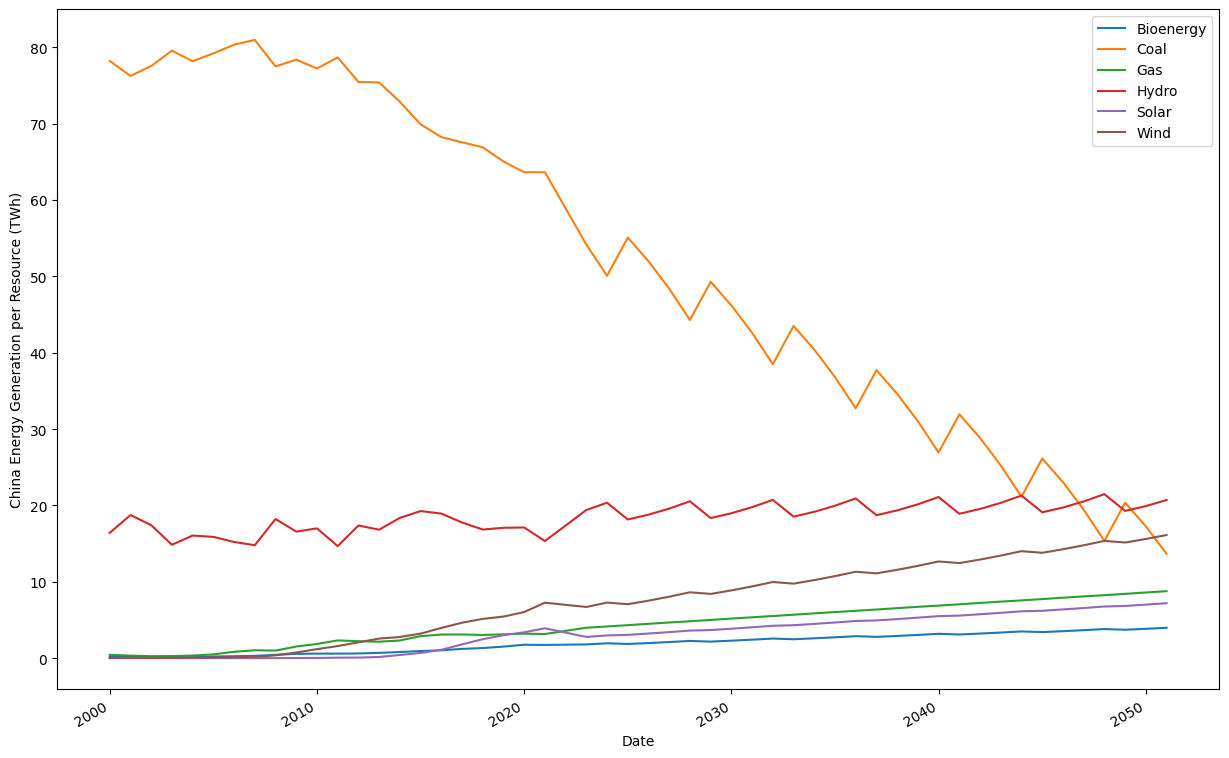

In [32]:
ChinaPlot = FullChinaData.set_index('ds').plot(figsize=(15, 10))
ChinaPlot.set_ylabel('China Energy Generation per Resource (TWh)')
ChinaPlot.set_xlabel('Date')  
plt.show()

In [33]:
china_file_name = 'Predicted_China_Dataset.xlsx'
FullChinaData.to_excel(china_file_name, index=False)